In [1]:
import fastai, pathlib

In [2]:
import fastai.vision as vision

In [3]:
chrono_images_path = pathlib.Path('/home/ubuntu/chrono-analyzer/data')

In [4]:
image_list = vision.ImageList.from_folder(chrono_images_path)

In [10]:
image_list.items[0]

PosixPath('/home/ubuntu/chrono-analyzer/data/gucci-27-599.jpg')

In [16]:
data = (
    vision.ImageList.from_folder(chrono_images_path)
    .split_by_rand_pct()
    .label_from_re(r'.*\/.+-.+-(.*).jpg', label_cls=vision.FloatList)
    .transform(vision.get_transforms())
    .databunch()
    .normalize(vision.imagenet_stats)
)

In [17]:
data

ImageDataBunch;

Train: LabelList (3147 items)
x: ImageList
Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210)
y: FloatList
599.0,49995.0,7700.0,6995.0,29999.0
Path: /home/ubuntu/chrono-analyzer/data;

Valid: LabelList (786 items)
x: ImageList
Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210),Image (3, 210, 210)
y: FloatList
5780.0,2162.0,5356.0,699.0,3290.0
Path: /home/ubuntu/chrono-analyzer/data;

Test: None

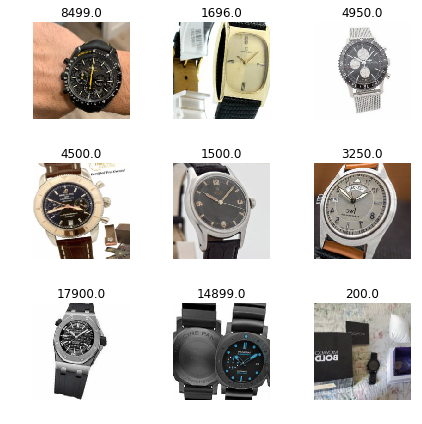

In [18]:
data.show_batch(3, figsize=(6,6))

In [34]:
learn = vision.cnn_learner(data, vision.models.resnet34, metrics=vision.error_rate)

In [35]:
learn.loss_func = vision.MSELossFlat()

In [36]:
learn.fit_one_cycle(20)

epoch,train_loss,valid_loss,error_rate,time
0,2444445184.000000,1764377984.000000,1.000000,00:23
1,2392561664.000000,1764071040.000000,1.000000,00:23
2,2436901376.000000,1763105152.000000,1.000000,00:23
3,2343325952.000000,1761317376.000000,1.000000,00:23
4,2541596672.000000,1757105920.000000,1.000000,00:23
5,2427263232.000000,1748792192.000000,1.000000,00:23
6,2326412288.000000,1741824768.000000,1.000000,00:23
7,2383153664.000000,1728644608.000000,1.000000,00:23
8,2319396352.000000,1716600576.000000,1.000000,00:23
9,2445342464.000000,1705462528.000000,1.000000,00:23


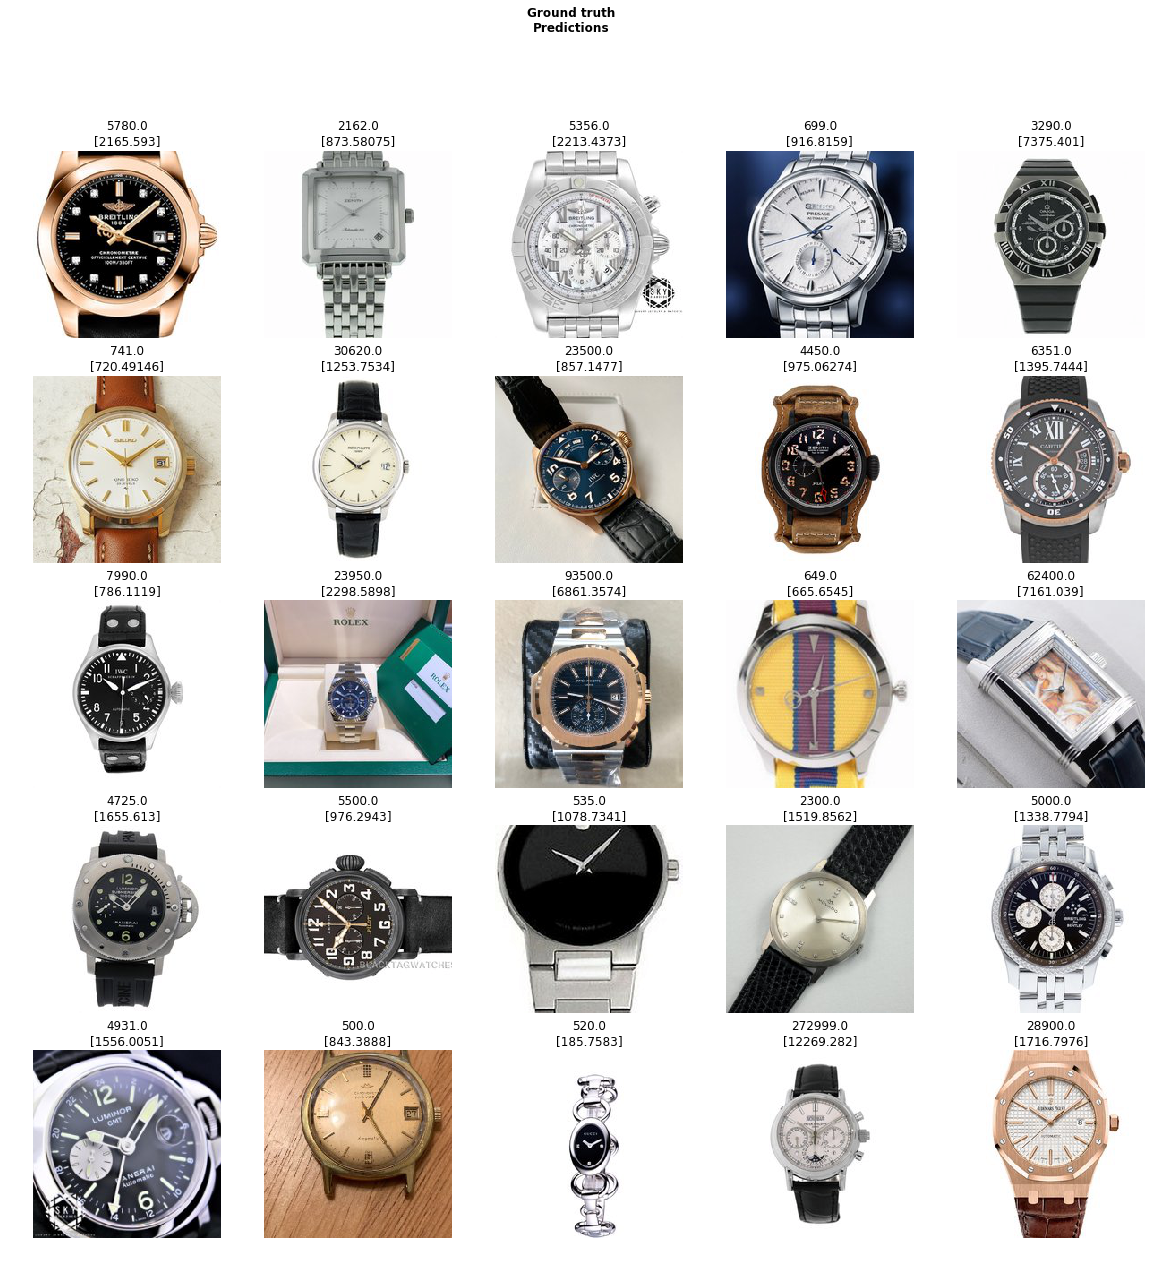

In [30]:
learn.show_results()

In [47]:
learn.fit_one_cycle(20, max_lr=slice(1e-2,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,733659968.000000,741667264.000000,1.000000,00:23
1,671973888.000000,670671424.000000,1.000000,00:23
2,706457536.000000,760636416.000000,1.000000,00:23
3,696920000.000000,671761408.000000,1.000000,00:23
4,726186880.000000,693357184.000000,1.000000,00:23
5,695375552.000000,688518848.000000,1.000000,00:23
6,662333312.000000,686051904.000000,1.000000,00:23
7,683632384.000000,665536064.000000,1.000000,00:23
8,685703232.000000,650645696.000000,1.000000,00:23
9,660096896.000000,674767488.000000,1.000000,00:23


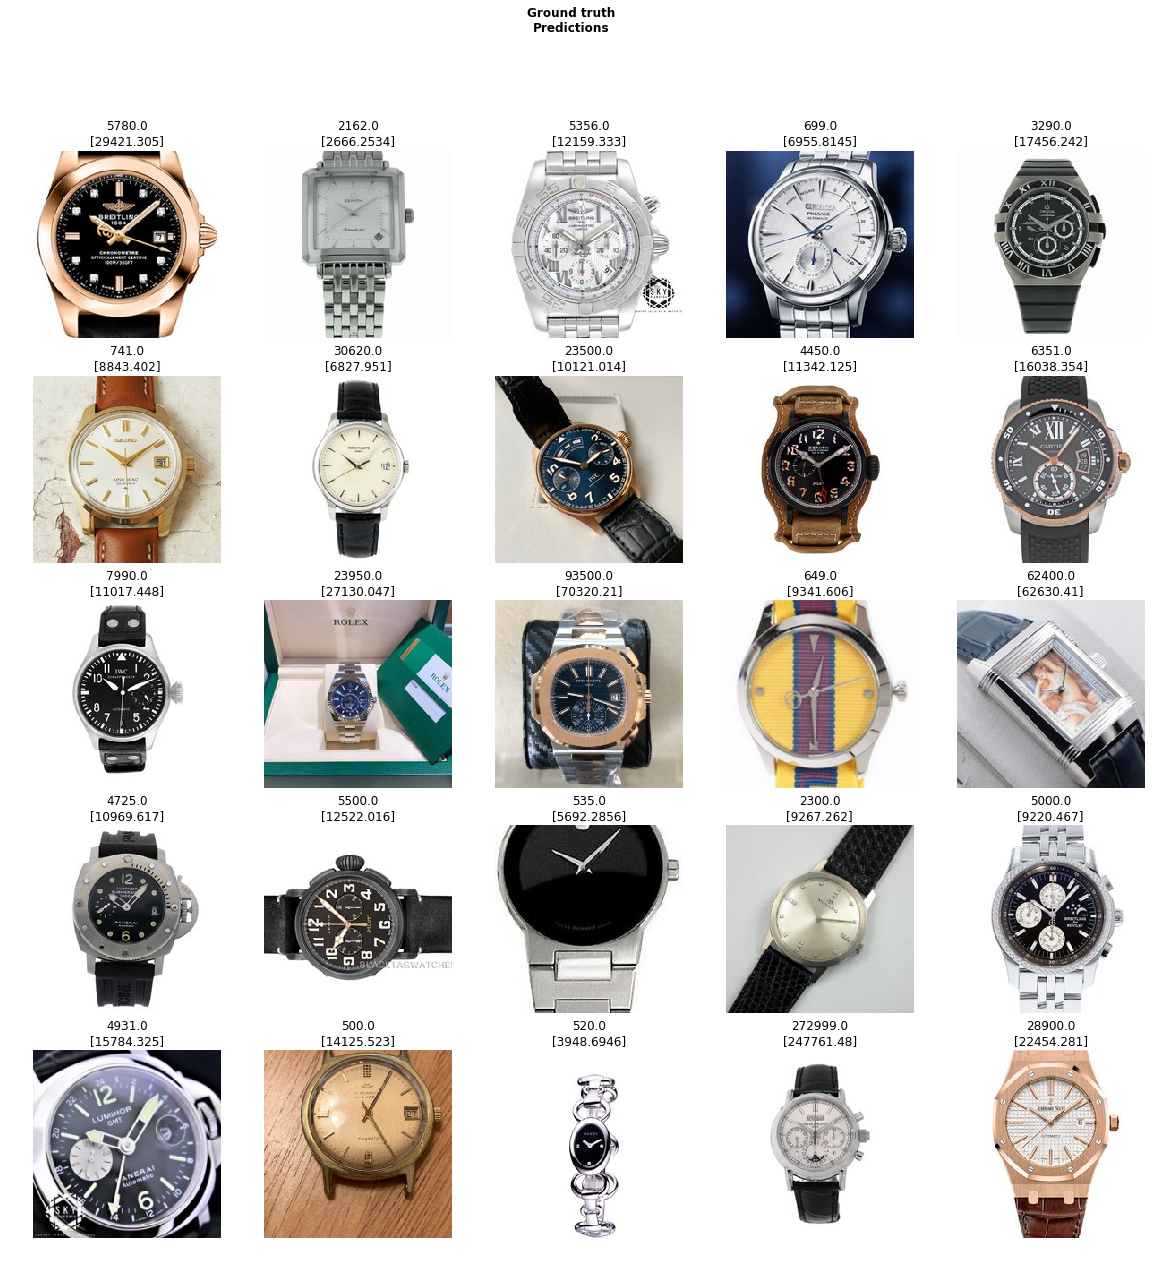

In [49]:
learn.show_results()

In [50]:
learn.export('regression.pkl')